# Exploration of Ford GoBike System Data
## by Muhammad Moustafa

## Preliminary Wrangling

> The data descripe individual trips in Ford GoBike system.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
# load data
df = pd.read_csv('data.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [4]:
#changing data type of start/end_time to datetime and bike_share_for_all_trip to bool.
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)
df.bike_share_for_all_trip = (df.bike_share_for_all_trip == 'Yes')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  float64       
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  int64         
 12  user_type       

In [6]:
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

#### The dataset have 183412 record so it's better to drop all null values

In [7]:
df.dropna(inplace=True)
df.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [8]:
print(df.shape)

(174952, 16)


### What is the structure of your dataset?

> The dataset consists of 183412 record and 16 columns.
Out of these 16 columnsm nine are numerical, two are datetime, four are object and one is boolean type.
The columns can be grouped into four main categories

- trip related
    - duration_sec
    - start_time/end_time
- station replated
    - start_station_id/end_station_id
    - start_station_name/end_station_name
    - start/end_station_latitude/longitude
- bike replated:
    - bike_id
    - bike_share_for_all_trip
- user related:
    - user_type: whether the user is customer or subsriber
    - member_birth_year
    - member_gender


### What is/are the main feature(s) of interest in your dataset?

> I would like to invistigate which factors affect trip duration

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

- duration_sec
- start_time/end_time
- start/end_station_name
- start/end_station_latitude/longitude
- user_type
- member_birth_year
- member_gender


## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

In [9]:
## Here I will create two columns that will help me doing invistigation
## add two columns for days and hours
df['start_time_weekday'] = df['start_time'].dt.day_name()
df['start_time_weekday'] = pd.Categorical(df.start_time_weekday, ordered=True,
                   categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
df['start_time_hour'] = df['start_time'].dt.hour
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_time_weekday,start_time_hour
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,False,Thursday,17
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,False,Thursday,12
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,False,Thursday,17
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,True,Thursday,23
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,False,Thursday,23


In [10]:
def get_bins(column, max_value:int=None, min_value:int=None, number_of_bins:int=20):
    """
    split data range into required number of bins
    Args:
    column: pandas series
    max/min_value: max and min value for columns
    number_of_bins: required number of bins, default = 20
    
    return: numpy array have the splitted numbers
    """
    if not max_value:
        max_value = column.max()
    
    if not min_value:
        min_value = column.min()
    
    step = (max_value - min_value) / number_of_bins
    bins = np.arange(min_value, max_value+step, step)
    return bins

def get_column_key_value(column):
    """
    takes a panda series and return a tuple that have 
    the series keys and values
    """
    return column.value_counts().keys(), column.value_counts()

#### Let's statr by invistigating the main variable "duraion_sec"

Max Duration = 84548 ms


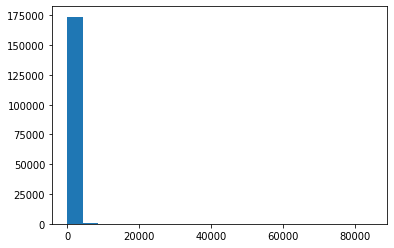

In [11]:
# plotting the histogram of trip duration
plt.hist(data=df, x='duration_sec', bins=get_bins(df.duration_sec))
print(f"Max Duration = {df.duration_sec.max()} ms")

#### The data is concentrated in the lower part. It's probably better to limit the data at 5k and convert into log scale

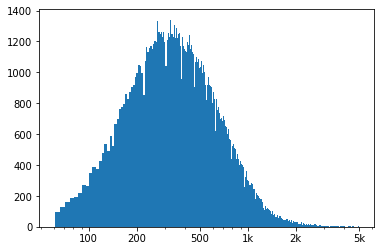

In [12]:
# plotting trip duraion in log scale
bins = get_bins(df.duration_sec, max_value=5e3, number_of_bins=1000) 
plt.hist(data = df, x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.xticks([100, 200, 500, 1e3, 2e3, 5e3], [100, 200, 500, '1k', '2k', '5k']);

#### Most data are below 2k with a peak around 400, The analysis should focus in this portion

In [13]:
df = df[df.duration_sec < 2e3]

#### Now, let's look about users birth year, but it would be better to see the age instead of birth year, so first let's extract age from this column and run the analysis, the data is collected in 2019, therefore subtracting year from 2019 would fetch the required info

In [14]:
df['age'] = np.array(2019 - df.member_birth_year).astype(int)

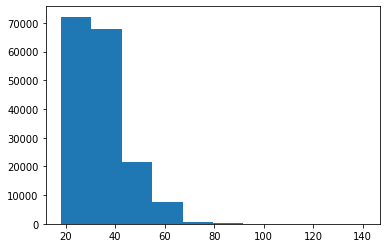

In [15]:
plt.hist(df.age, bins=get_bins(df.age, number_of_bins=10));

#### Most values of age is less than 70 with peak around 30

In [16]:
df = df[df.age < 70]

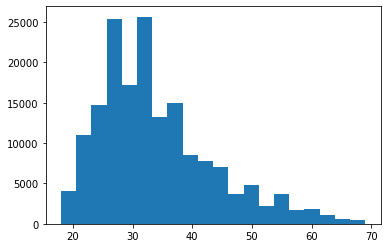

In [17]:
plt.hist(df.age, bins=get_bins(df.age));

#### Let's get a look on station start and end points

In [18]:
df.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip',
       'start_time_weekday', 'start_time_hour', 'age'],
      dtype='object')

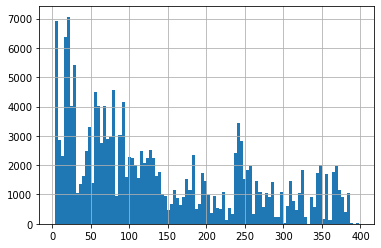

In [19]:
df.start_station_id.hist(bins=100);

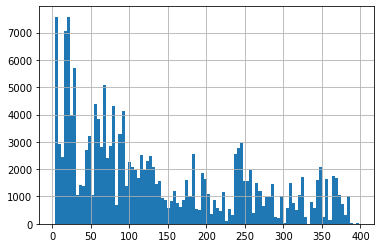

In [20]:
df.end_station_id.hist(bins=100);

#### Same stations are frequent as start and end stations

#### let's look at memeber type and gender

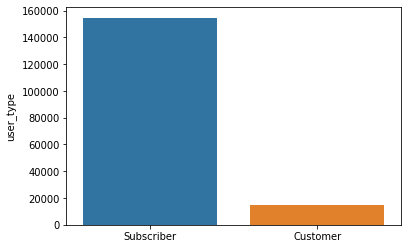

In [21]:
# bar plot for user type
x, y = get_column_key_value(df.user_type)
sb.barplot(x=x, y=y);

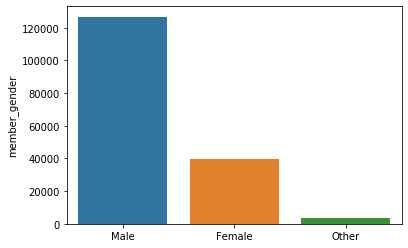

In [22]:
# bar plot for member gender

x, y = get_column_key_value(df.member_gender)
sb.barplot(x=x, y=y);

#### Subscriber and Male are most probable

#### Which hour/day have the most trip count?

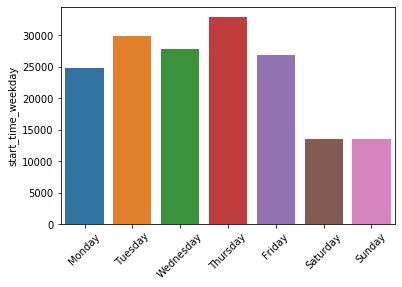

In [23]:
# Plot bar plot for starting time vs days
x, y = get_column_key_value(df.start_time_weekday)
sb.barplot(x=x, y=y);
plt.xticks(rotation = 45);

#### As expected, The least days are the weekend days

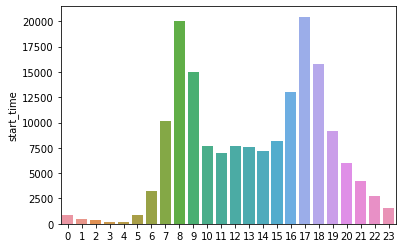

In [24]:
# Plot bar plot for starting time vs hours
x, y = get_column_key_value(df.start_time.dt.hour)
sb.barplot(x=x, y=y);

#### Again as expected, there are 2 peaks at 8 and 17, "the start and the end hours of work day". 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The trip duration has a huge amount of values, most of them are in the lower part. so I used log scale to generate a better visualization and remove outliers

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

I subtracted 2019 from the member_birth_year to get Age

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

#### First, let's look at duration vs age

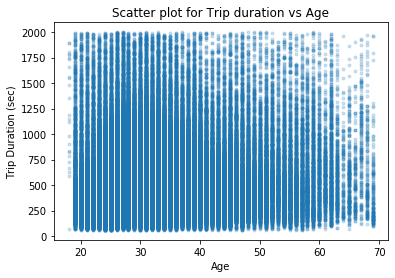

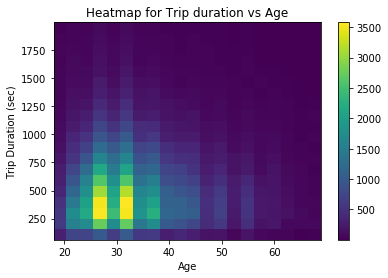

In [25]:
# plot scatter plot and heat map for age and trip duration

# scatter plot
plt.scatter(df.age, df.duration_sec, alpha = 0.2, marker='.');
plt.title('Scatter plot for Trip duration vs Age')
plt.xlabel('Age')
plt.ylabel('Trip Duration (sec)')
plt.show()

# Heat map

# Specify bin edges
bins_x = get_bins(df.age)
bins_y = get_bins(df.duration_sec)
plt.hist2d(data=df, x='age', y='duration_sec', bins=[bins_x, bins_y]);
plt.colorbar();
plt.title('Heatmap for Trip duration vs Age')
plt.xlabel('Age')
plt.ylabel('Trip Duration (sec)')
plt.show()

#### Both short and long trips are most frequently made by bikers between 25 and 35

#### Let's explre the duration member vs member gender

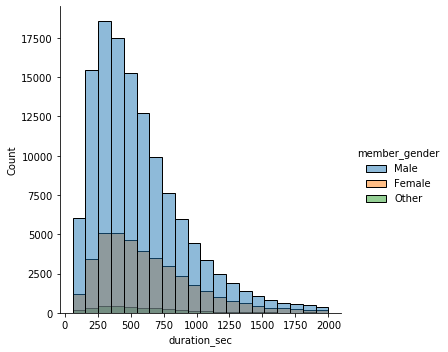

In [26]:
sb.displot(data=df, x='duration_sec', hue='member_gender', bins=get_bins(df.duration_sec));

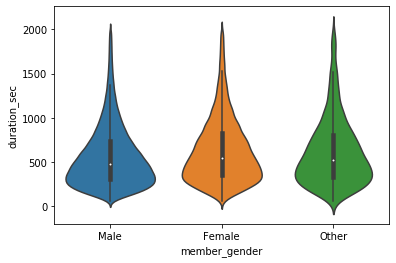

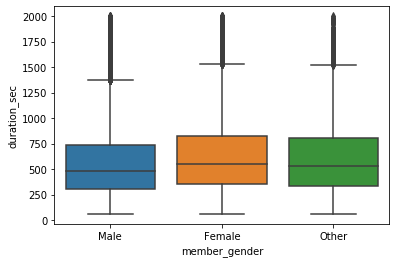

In [27]:
## violin and box plot for member gender vs trip duration in sec

sb.violinplot(data=df, x='member_gender', y='duration_sec');
plt.show()
sb.boxplot(data=df, x='member_gender', y='duration_sec');

####  All genders have nearly the same duration distribution with peak between 250 and 750 secnds
#### The median value for female is slightly higher than male and other

#### Let's explre the duration member vs uesr_type

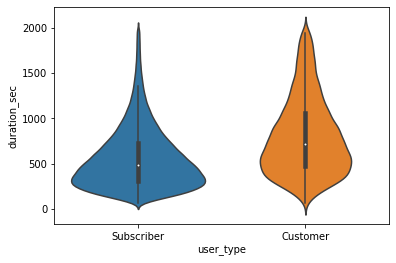

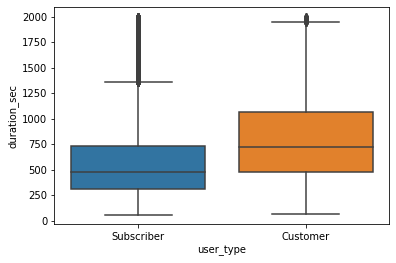

In [28]:
## violin and box plot for user type vs trip duration in sec

sb.violinplot(data=df, x='user_type', y='duration_sec');
plt.show()
sb.boxplot(data=df, x='user_type', y='duration_sec');

#### We can see that on average that customers do longer trips than subscribers

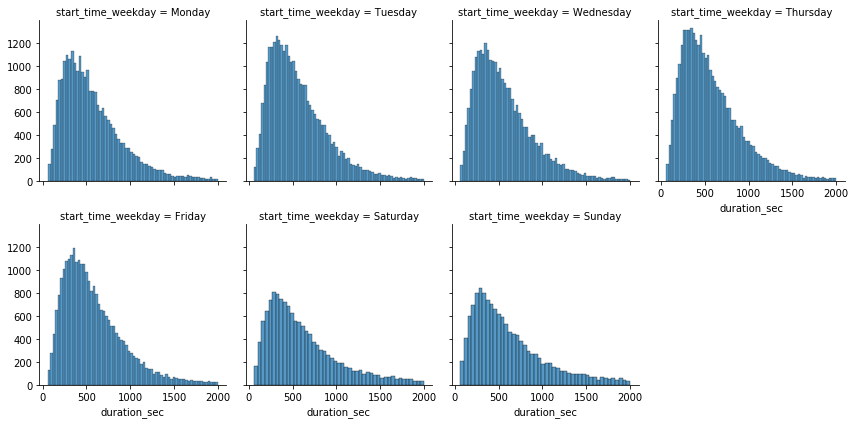

In [29]:
# Creating Facet Grid
# add histogram of trip duration agains days
g = sb.FacetGrid(df, col='start_time_weekday', col_wrap=4);
g.map(sb.histplot, 'duration_sec');

#### Most long trips are done on weekends

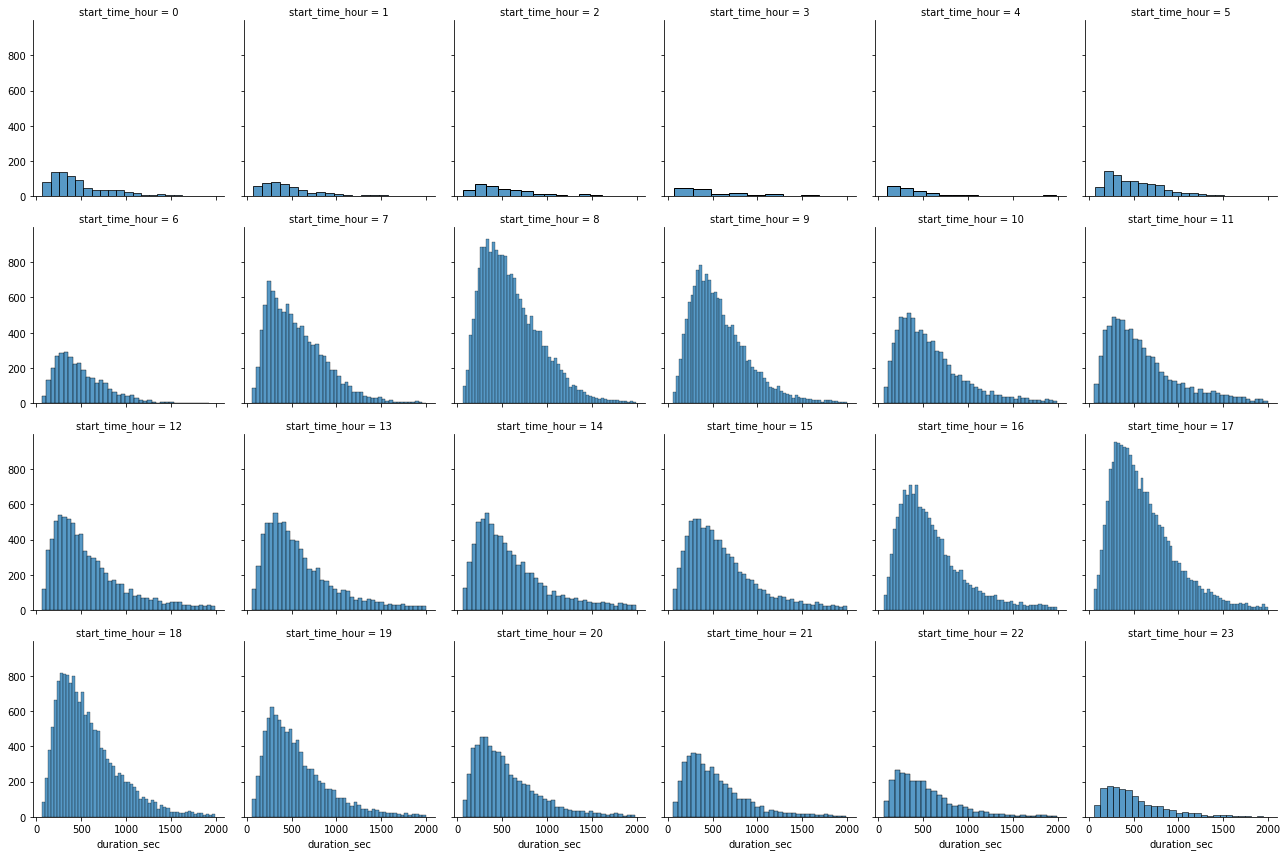

In [30]:
# Creating Facet Grid and add histogram of trip duration agains hours
g = sb.FacetGrid(df, col='start_time_hour', col_wrap=6)
g.map(sb.histplot, 'duration_sec');

#### Most long trips are done between 11 and 17, There are nearly no long trips done between 0 and 6

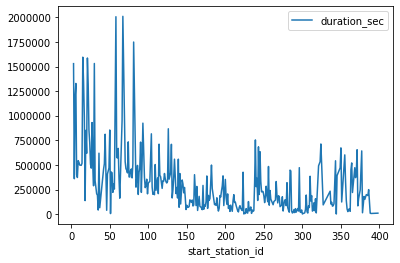

In [31]:
## plot the summation of trips against start station id
df.groupby('start_station_id').sum().reset_index().plot(x='start_station_id', y='duration_sec');

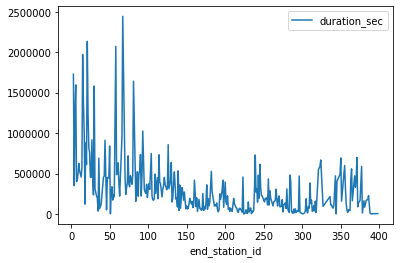

In [32]:
## plot the summation of trips against end station id

df.groupby('end_station_id').sum().reset_index().plot(x='end_station_id', y='duration_sec');

#### The same stations are associated with longer/shorter trip whether as start or end destination 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

The trip duration is strongly associated with age, start/end station, and user_type, and of course the trip hour

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Intrestingly, Females have higher trip duration than males. Weekends also have higher trip duration, maybe because users ride bike for fun instead of going to a pre-determined place.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

#### Here I will invistigate the relationship between trip_duration, age and [user_type, member_gender, start_time_week/hour]

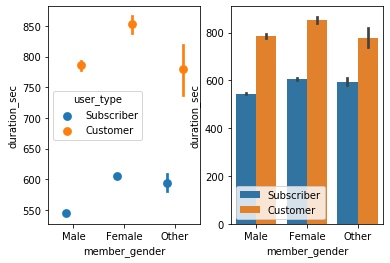

In [33]:
## Create subplots consisting of 1 row and 2 columns
fig, ax = plt.subplots(1, 2)
## set axis 0 as the current axis
plt.sca(ax[0])
## Point plot for trip duration vs member gender
sb.pointplot(data = df, x = 'member_gender', y = 'duration_sec', hue = 'user_type', dodge = 0.3, linestyles = "");

## set axis 1 as the current axis
plt.sca(ax[1])
## Bar plot for trip duration vs member gender
sb.barplot(data = df, x = 'member_gender', y = 'duration_sec', hue = 'user_type');
ax[1].legend();

#### Customers do longer trips than subscribers, Females do longer trips than males and other

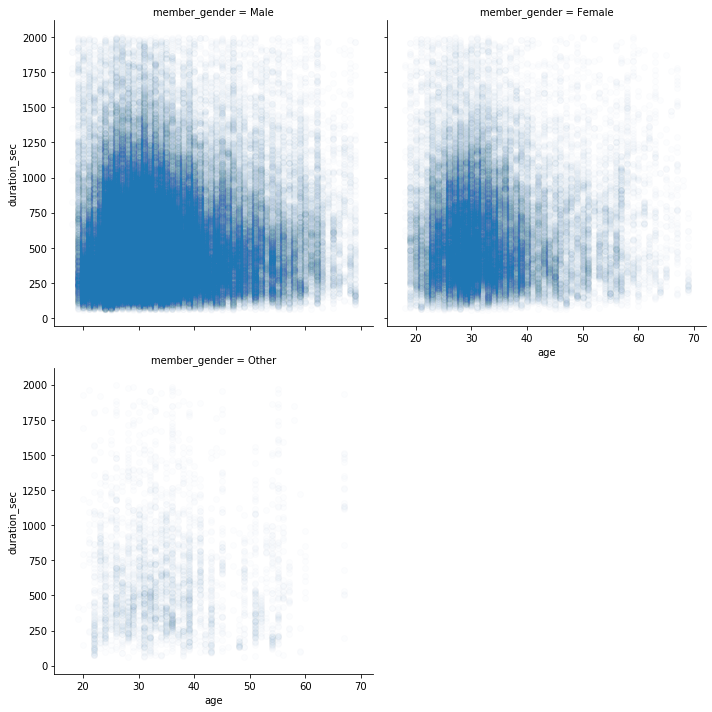

In [34]:
## Facet Grid for trip duration vs Age splitted by gender
g = sb.FacetGrid(data=df, col='member_gender', col_wrap=2, height=5);
g.map(plt.scatter, 'age', 'duration_sec', alpha=0.01);

#### Older males do longer trips than females

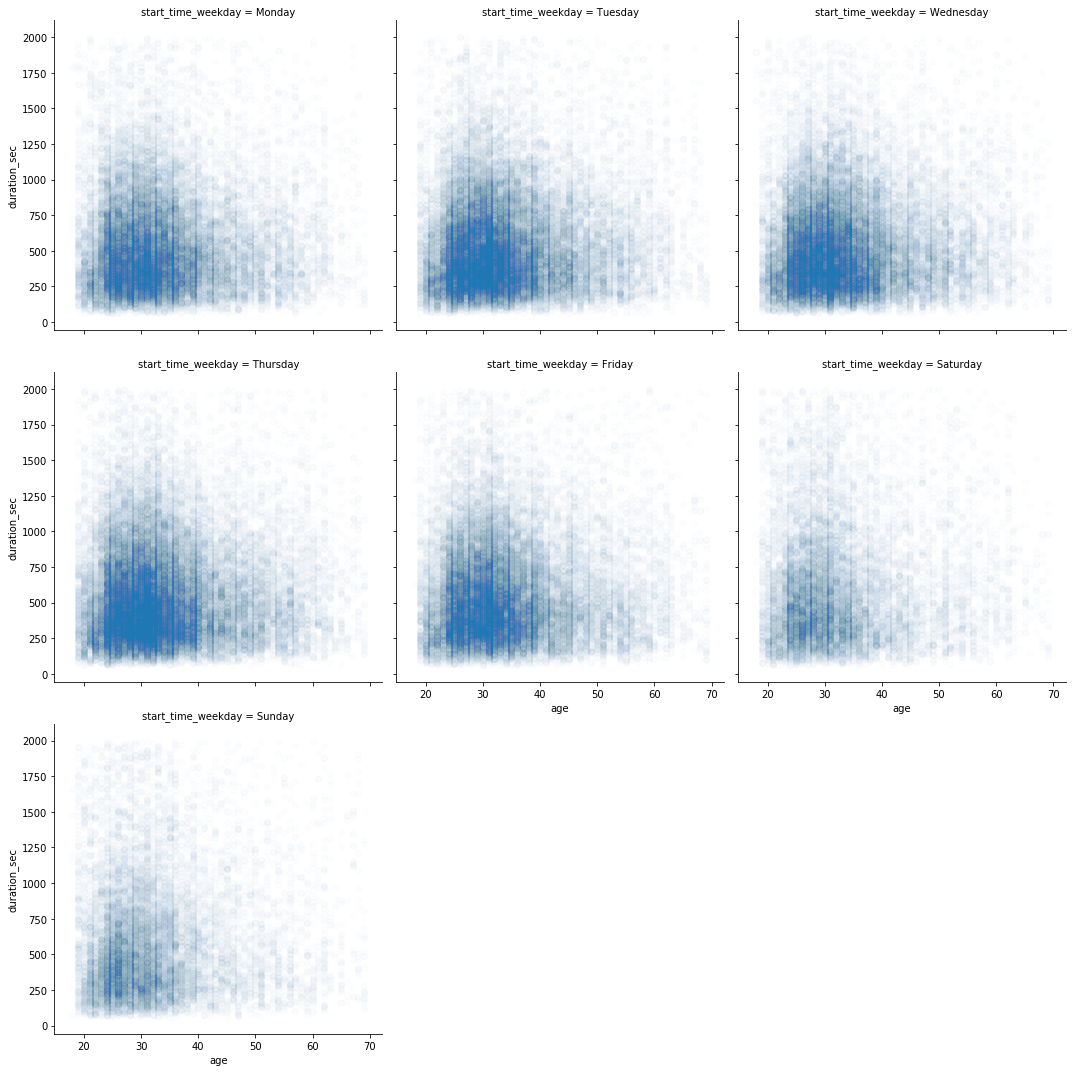

In [35]:
## Facet Grid for trip duration vs Age splitted by days

g = sb.FacetGrid(data=df, col='start_time_weekday', col_wrap=3, height=5);
g.map(plt.scatter, 'age', 'duration_sec', alpha=0.01);

#### It seems those who are at working age are doing most of the trips

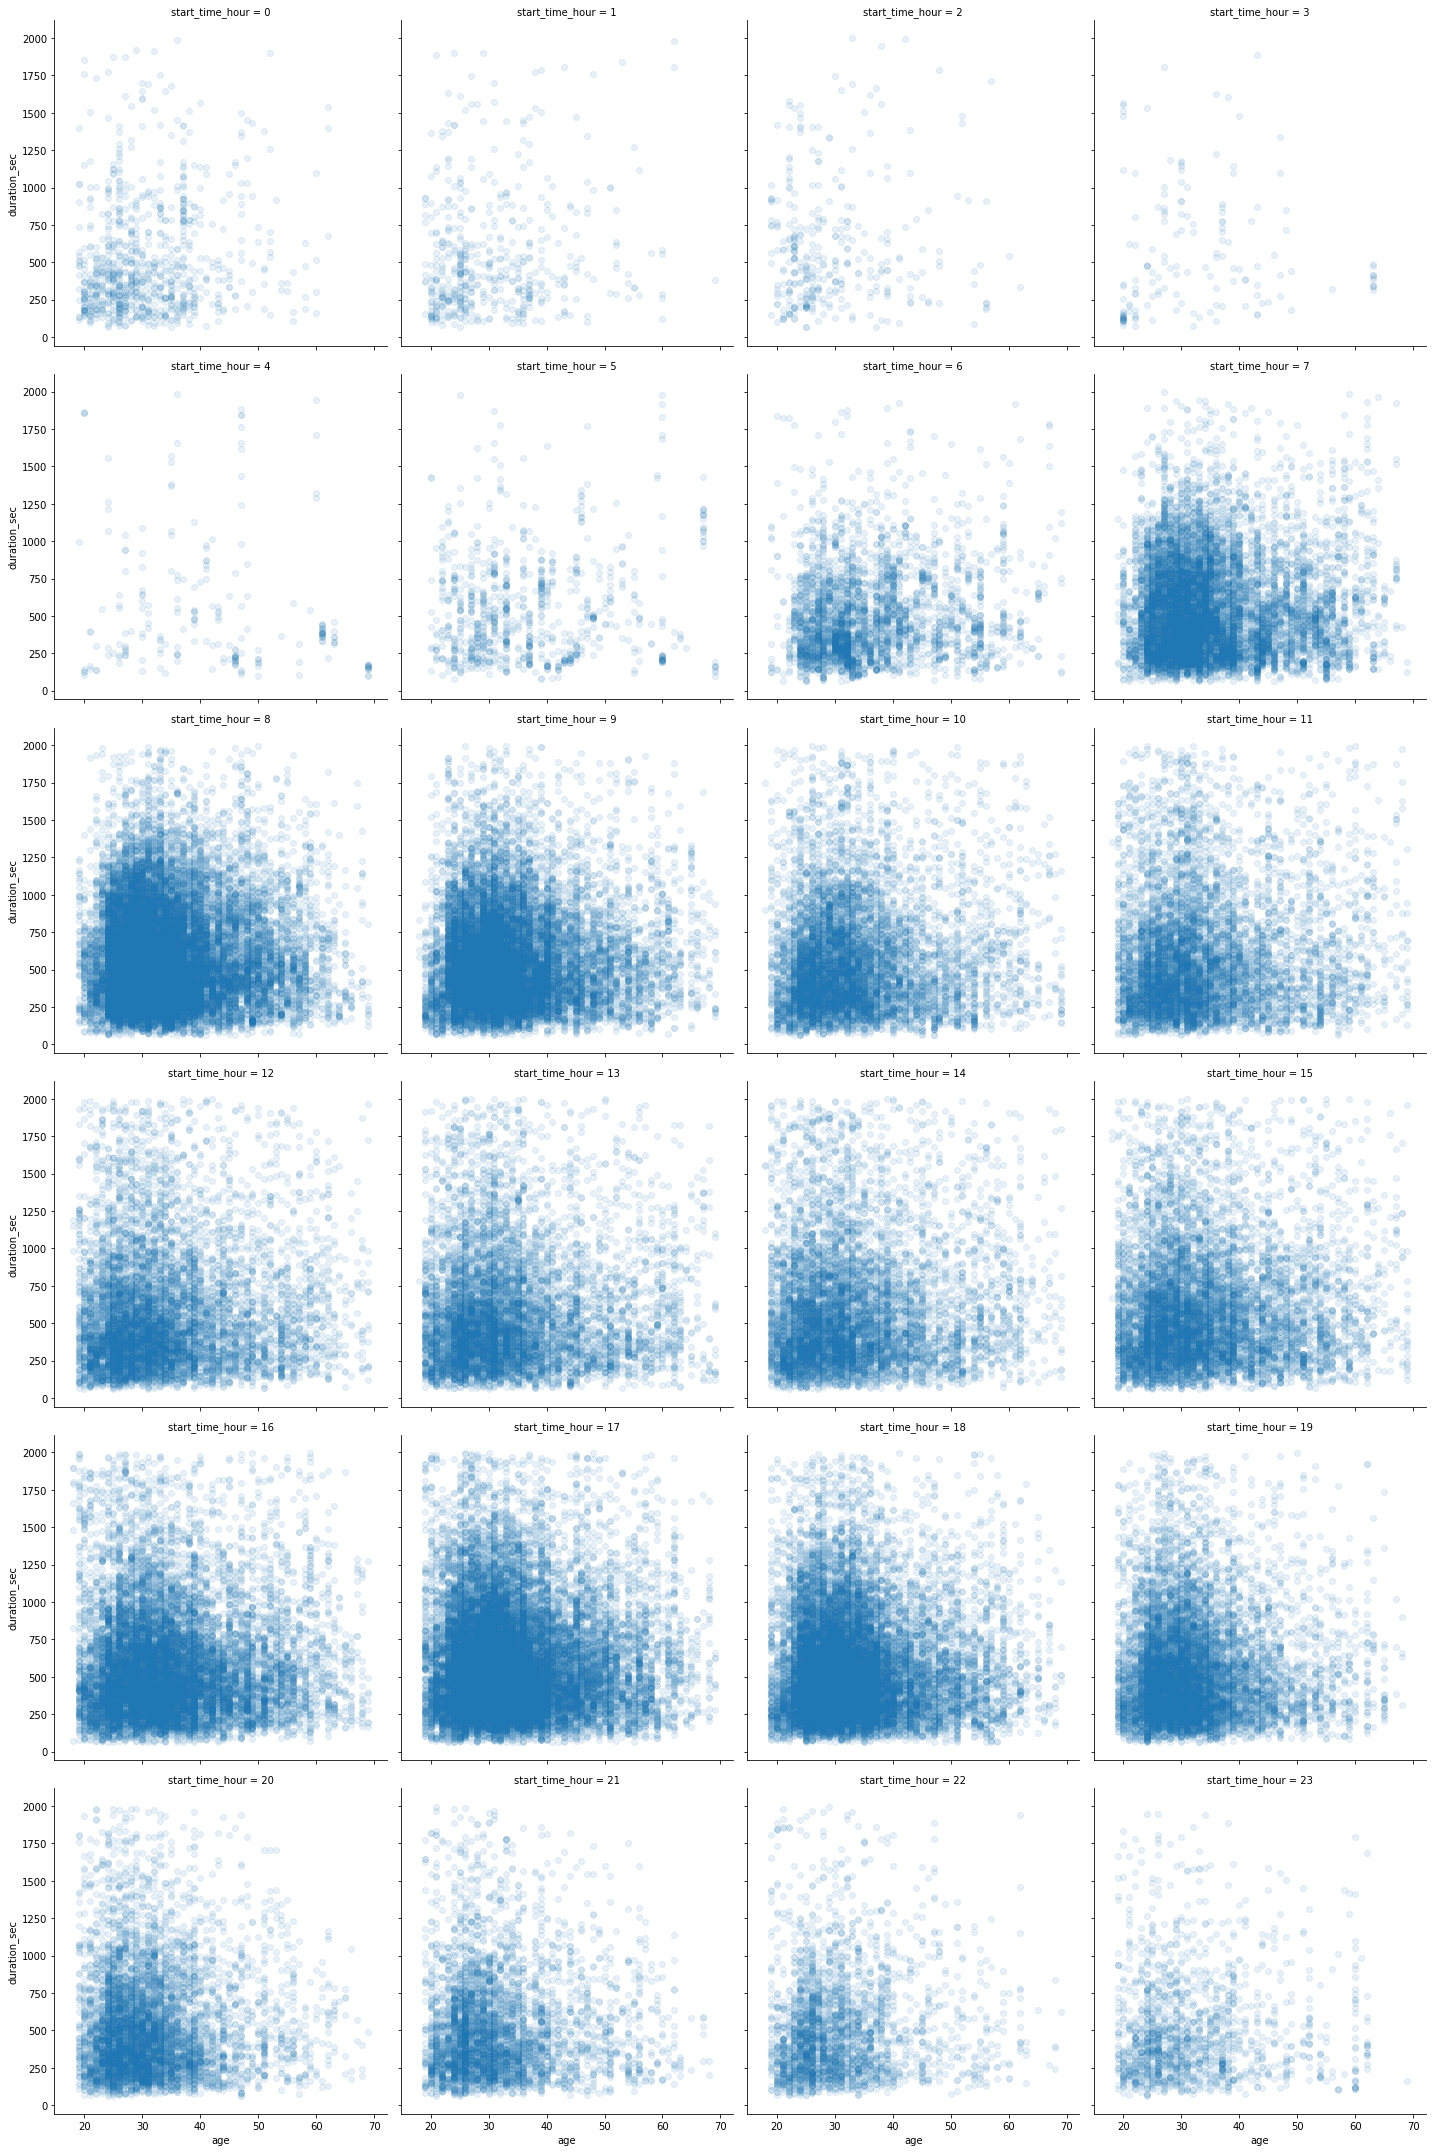

In [36]:
## Facet Grid for trip duration vs Age splitted by hours

g = sb.FacetGrid(data=df, col='start_time_hour', col_wrap=4, height=5);
g.map(plt.scatter, 'age', 'duration_sec', alpha=0.1);

#### Older people do bike trips at the morning more than any othet time

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

We observed that customer do longer trips than subscribers, Although females do longer trips than males, older males do longer trips than females. The most portion using go ford bikes are those who at the working age, and they probably do their trips on weekdays

### Were there any interesting or surprising interactions between features?

It is nice to see older people do morning bike rides.

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!